In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
# read the dataset
df = pd.read_csv('../../data/raw_data/Rain_Australia.csv')

In [3]:
# show the first 5 rows
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [4]:
# dataset dimension
df.shape

(142193, 24)

In [5]:
# show the column types
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [6]:
# convert 'Date' to datetime object 
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True) 

In [7]:
# number of unique values per feature
df.nunique().sort_values(ascending=False)

Date             3436
RISK_MM           681
Rainfall          679
Pressure3pm       549
Pressure9am       546
MaxTemp           505
Temp3pm           500
Temp9am           440
MinTemp           389
Evaporation       356
Sunshine          145
Humidity3pm       101
Humidity9am       101
WindGustSpeed      67
Location           49
WindSpeed3pm       44
WindSpeed9am       43
WindGustDir        16
WindDir9am         16
WindDir3pm         16
Cloud9am           10
Cloud3pm           10
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
# drop column 'Date' and 'Location'as irrelevant
df = df.drop(columns = ['Date', 'Location'])

In [9]:
# check if there are NaN values
df.isna().values.any()

True

In [10]:
# number of missing values per feature
df.isnull().sum().sort_values(ascending=False)

Sunshine         67816
Evaporation      60843
Cloud3pm         57094
Cloud9am         53657
Pressure9am      14014
Pressure3pm      13981
WindDir9am       10013
WindGustDir       9330
WindGustSpeed     9270
WindDir3pm        3778
Humidity3pm       3610
Temp3pm           2726
WindSpeed3pm      2630
Humidity9am       1774
Rainfall          1406
RainToday         1406
WindSpeed9am      1348
Temp9am            904
MinTemp            637
MaxTemp            322
RISK_MM              0
RainTomorrow         0
dtype: int64

In [11]:
# drop the first four columns with highest number of missing values
df = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

In [12]:
# check if there are NaN values
df.isna().values.any()

True

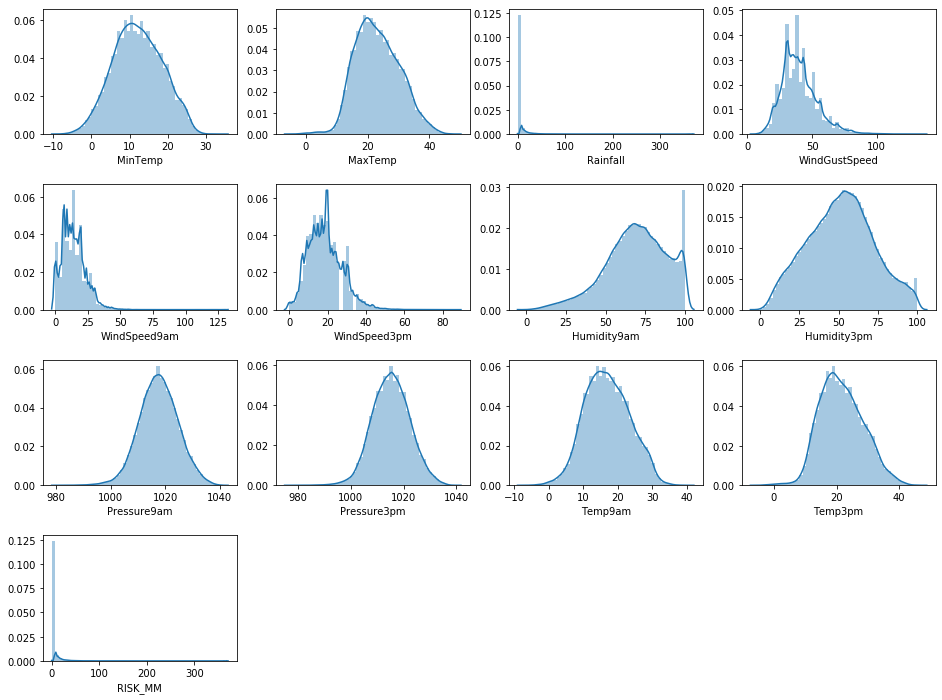

In [13]:
# select only the numerical features
df_numeric = df.select_dtypes(include=np.number)

# plot the distribution of each numerical feature
fig = plt.figure(figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
for i, col in enumerate(df_numeric.columns):
    ax = fig.add_subplot(4, 4, i+1)
    hist = sns.distplot(df_numeric[col], ax=ax)

In [14]:
# fill the NaN values of the numerical features with the mean or median value

df['Humidity3pm'] = df['Humidity3pm'].fillna(value = df['Humidity3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(value = df['Humidity9am'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(value = df['MaxTemp'].mean())

df['MinTemp'] = df['MinTemp'].fillna(value = df['MinTemp'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(value = df['Pressure3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(value = df['Pressure9am'].mean())

df['Rainfall'] = df['Rainfall'].fillna(value = df['Rainfall'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(value = df['Temp3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(value = df['Temp9am'].mean())

df['WindGustSpeed'] = df['WindGustSpeed'].fillna(value = df['WindGustSpeed'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(value = df['WindSpeed3pm'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(value = df['WindSpeed9am'].median())

In [15]:
# fill the NaN values of the categorical features with the most frequent value

df['WindGustDir']= df['WindGustDir'].fillna(df['WindGustDir'].value_counts().idxmax())
df['WindDir9am']= df['WindDir9am'].fillna(df['WindDir9am'].value_counts().idxmax())
df['WindDir3pm']= df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().idxmax())
df['RainToday']= df['RainToday'].fillna(df['RainToday'].value_counts().idxmax())

In [16]:
#check if the data is balanced
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [17]:
# create balanced dataset
df = pd.concat([df[df['RainTomorrow'] == 'No'].sample(32000), df[df['RainTomorrow'] == 'Yes']])

In [18]:
# write dataset to csv file
df.to_csv('../../data/clean_data/Rain_Australia.csv')